In [1]:

import numpy as np
from types import SimpleNamespace
from scipy import optimize
par =  SimpleNamespace()
sol = SimpleNamespace()
opt = SimpleNamespace()
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
from inauguralproject import HouseholdSpecializationModelClass

## Question 1 - HF/HM
In the inaugural project we are considering household with a male and a female member. Where we are illustrating how the relative hours worked by the female changes compared to the male due to variations of $\alpha$ and $\sigma$. In Question 1 we are illustrating $\frac{H_F}{H_M}$ for $\alpha \in [0.25,0.5,0.75]$ and $\sigma = [0.5, 1.0, 1.5]$.  

c:\Users\priya\Documents\ucph\Sem 2\prog\ntb603p\ip\imdone.py:66: RuntimeWarning: divide by zero encountered in power
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-10)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-10))**((par.sigma/(par.sigma+1e-10-1)))


alpha = 0.25 , sigma = 0.5 -> HF/HM = 0.55
alpha = 0.25 , sigma = 1.0 -> HF/HM = 0.31
alpha = 0.25 , sigma = 1.5 -> HF/HM = 0.21
alpha = 0.50 , sigma = 0.5 -> HF/HM = 1.00
alpha = 0.50 , sigma = 1.0 -> HF/HM = 1.00
alpha = 0.50 , sigma = 1.5 -> HF/HM = 1.00
alpha = 0.75 , sigma = 0.5 -> HF/HM = 1.83
alpha = 0.75 , sigma = 1.0 -> HF/HM = 3.25
alpha = 0.75 , sigma = 1.5 -> HF/HM = 4.67


Text(0.5, 0, '$\\frac{H_{F}}{H_{M}}$')

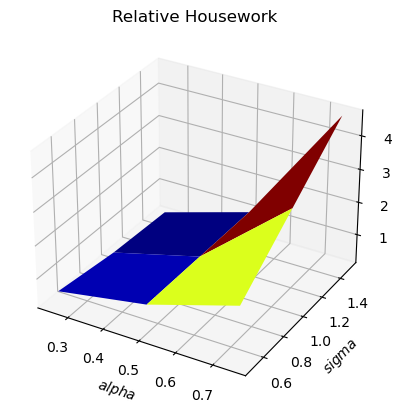

In [2]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module
from matplotlib import cm # for colormaps
import numpy as np


#creating an instance of the HouseholdSpecializationModelClass
HHS = HouseholdSpecializationModelClass()

alphalist = (0.25,0.50,0.75)
sigmalist = (0.5,1.0,1.5)

#creating a 3X3 grid for the 3D plot
shape_tuple = (3,3)
#creating empty arrays to store the results
alpha_vec = np.empty(shape_tuple)
sigma_vec = np.empty(shape_tuple)
HFHM_vec = np.empty(shape_tuple)


for i, a in enumerate(alphalist):
    for j, s in enumerate(sigmalist):
        HHS.par.alpha = a
        HHS.par.sigma = s
        z = HHS.solve_discrete()
        # calculating the relative housework ratio
        HFHM = z.HF/z.HM
        #print the results
        print(f'alpha = {HHS.par.alpha:.2f} , sigma = {HHS.par.sigma:.1f} -> HF/HM = {HFHM:.2f}')
        # saving the results in the vectors
        alpha_vec[i,j] = a
        sigma_vec[i,j] = s
        HFHM_vec[i,j] = HFHM

# Plotting the results in a 3D plot
fig = plt.figure() 
ax = fig.add_subplot(111,projection='3d') # create a 3d type axis
# creating a surface plot in the axis using alpha_vec, sigma_vec, and HFHM_vec arrays as the x, y, and z coordinates
ax.plot_surface(alpha_vec, sigma_vec, HFHM_vec, cmap=cm.jet); 
ax.set_title('Relative Housework')
ax.set_xlabel('$alpha$') 
ax.set_ylabel('$sigma$')
ax.set_zlabel(r'$\frac{H_{F}}{H_{M}}$')


# Interpretation of Q1
The illustration is a 3D plot that shows the relation between $\frac{H_F}{H_M}, \alpha$ and $\sigma$. The surface creates the relationship between the variables.
The parameter $\alpha$  represents the productivity of females in household production compared to males, while $\sigma$ represents the degree to which household tasks can be substituted between partners (female and male).$\frac{HF}{HM}$ is the ratio of time spent on hours working at home, where $>1$ indicates that the female member spends more time on house work than the male. A low sigma implies the ratio of female to male housework becomes more dependent on the value of alpha, implying more household work for the ladies, uh.

## Question 2 - Discrete time
Illustration of $\log{\frac{H_M}{H_F}}$ against $\log{\frac{w_F}{w_M}}$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$, where $w_F$ represents the different wages.

Text(0, 0.5, '$log\\left(\\frac{H_{F}}{H_{M}}\\right)$')

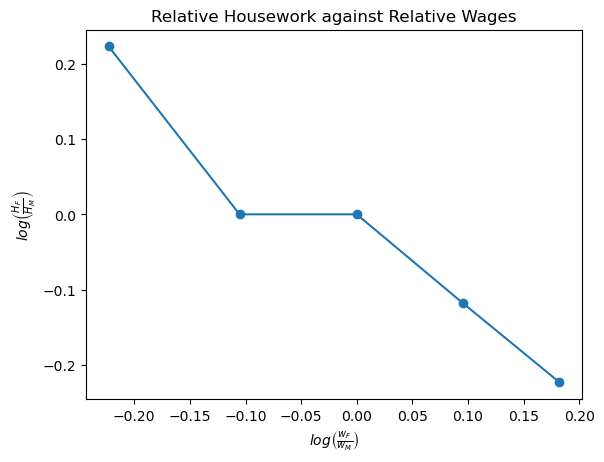

In [4]:

HHS = HouseholdSpecializationModelClass()
# a. reset the parameter values
HHS.par.sigma = 1
HHS.par.alpha = 0.5 
wflist = (0.8, 0.9, 1.0, 1.1,1.2)

# b. create the figure
fig = plt.figure()

# c. create the plot 
ax = fig.add_subplot(1,1,1)

# d. create empty vectors for the independent and dependent values
lnwFwM_vec = np.empty(5)
lnHFHM_vec = np.empty(5)

# e. Loop over the values of wF
for i, wf1 in enumerate(wflist):
    # Set the value of wF parameter in the HHS object to the current value
    HHS.par.wF = wf1
    #calculate the log of the relative wages
    lnwFwM = np.log(HHS.par.wF/HHS.par.wM)
    # Solve the discrete household model using the updated parameter values
    x = HHS.solve_discrete()
    #calculate the log of the relative housework
    lnHFHM = np.log(x.HF/x.HM)
    #fill the vectors
    lnwFwM_vec[i] = lnwFwM
    lnHFHM_vec[i] = lnHFHM

# f. plot
ax.plot(lnwFwM_vec,lnHFHM_vec) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.scatter(lnwFwM_vec,lnHFHM_vec)
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')

# Interpretation of Q2
The illustration from Question 2 shows the relation between the relative wages of woman and man and the relative amount of housework they do. The x-axis shows the log ratio of the womans and the man's work at the wage. The y-axis represents the log ratio of the woman and the man's work at the house. The scatter shows the data points given and the line shows the trend between the data points. We can see a negative relationship between the relative wage and the relative housework. In other words, it suggests that the woman's wages increase relative to the man's wages, their relative share of housework decreases.

## Question 3 - Continuous time
It is now assumes that choice made are continuous and given as $L_M, L_F, H_M, H_F$  in [0,24].

0.2231262578188158
0.10537359590688437
3.763495607532627e-06
-0.09532444075593426
-0.18231971604815553


c:\Users\priya\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


Text(0, 0.5, '$log\\left(\\frac{H_{F}}{H_{M}}\\right)$')

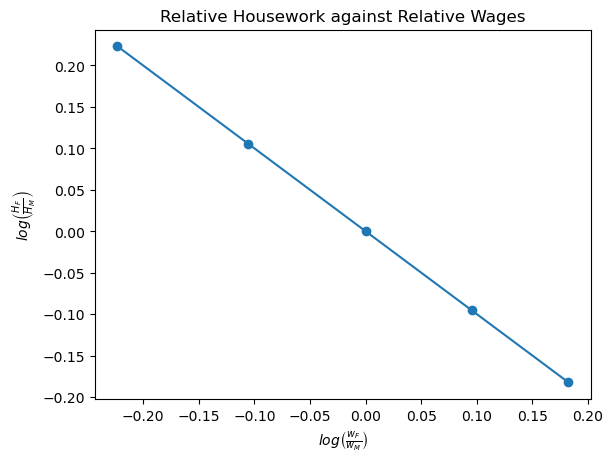

In [5]:
# a. reset the parameter values
HHS.par.sigma = 1
HHS.par.alpha = 0.5 
wflist = (0.8, 0.9, 1.0, 1.1,1.2)

# b. create the figure
fig = plt.figure()

# c. create the plot 
ax = fig.add_subplot(1,1,1)

# d. create empty vectors for the independent and dependent values
lnwFwM_vec = np.empty(5)
lnHFHM_vec = np.empty(5)

# e. fill the vectors
for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF/HHS.par.wM)
    y = HHS.solve_continue()
    lnHFHM = np.log(y.HF/y.HM)
    print(lnHFHM)
    lnwFwM_vec[i] = lnwFwM
    lnHFHM_vec[i] = lnHFHM


# f. plot
ax.plot(lnwFwM_vec,lnHFHM_vec) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.scatter(lnwFwM_vec,lnHFHM_vec)
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')

# Interpretation of Q3
The plot shows the relationship between the log of relative wages ($\log(w_F/w_M)$) and the log of the magnitude of relative housework ($\log(H_F/H_M)$) in a household where the female and male have different levels of productivity and face different wage rates. There are 5 points, which is the results from the female wages. As the relative wage ratio increases, the magnitude of relative housework also increases. The slope of the line is negative, indicating a negative relationship between the two variables.
We also see that using a continuous interval for the female-to-male labor and household hours, allows for a more precise representation of the relationship between these variables.

## Question 4
Siminski and Yetsenga (2022) presents the following regression in run on time use data couples:

$\log{\frac{H_F}{H_M}} = \beta_0 +\beta_1 \log{\frac{w_F}{w_M}}$

and find the best results to be $\beta_0 \approx 0.4$ and $\beta_1 \approx -0.1$. 

We create a for loop to run through all the combinations of $\alpha$ and $\sigma$, estimate the coefficients of a linear regression model and compare the model performance using the sum of squared errors.

c:\Users\priya\Documents\ucph\Sem 2\prog\ntb603p\ip\imdone.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-10)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-10))**((par.sigma/(par.sigma+1e-10-1)))
C:\Users\priya\AppData\Local\Temp\ipykernel_30484\2366088957.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lnHFHM = np.log(y.HF / y.HM)
c:\Users\priya\Documents\ucph\Sem 2\prog\ntb603p\ip\imdone.py:66: RuntimeWarning: invalid value encountered in double_scalars
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-10)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-10))**((par.sigma/(par.sigma+1e-10-1)))
c:\Users\priya\Documents\ucph\Sem 2\prog\ntb603p\ip\imdone.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alpha
c:\Users\priya\Documents\ucph\Sem 2\prog\ntb603p\ip\imdone.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H

The minimizing parameter values are: alpha = 0.6000, sigma = 1.0000
The beta values are: beta0 = 0.2533, beta1 = -0.2599
The sum of squared errors is: 0.0471


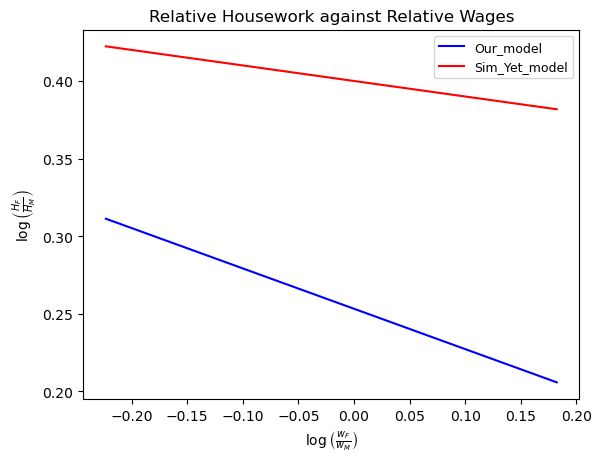

In [6]:
import numpy as np
import matplotlib.pyplot as plt

best_res = float('inf')
best_beta0 = None
best_beta1 = None

alpha_list = np.linspace(0.5, 1.5, 11)
sigma_list = np.linspace(0.5, 1.5, 11)

wflist = (0.8, 0.9, 1.0, 1.1, 1.2)

lnwFwM_vec = np.empty(5)
lnHFHM_vec = np.empty(5)

for a in alpha_list:
    for s in sigma_list:
        HHS = HouseholdSpecializationModelClass()
        HHS.par.sigma = s
        HHS.par.alpha = a

        for i, wf1 in enumerate(wflist):
            HHS.par.wF = wf1
            lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
            y = HHS.solve_continue()
            lnHFHM = np.log(y.HF / y.HM)
            lnwFwM_vec[i] = lnwFwM
            lnHFHM_vec[i] = lnHFHM

        x = lnwFwM_vec
        y = lnHFHM_vec
        A = np.vstack([np.ones(x.size), x]).T
        HHS.sol.beta0, HHS.sol.beta1 = np.linalg.lstsq(A, y, rcond=None)[0]
        new_res = (0.4 - HHS.sol.beta0) ** 2 + (-0.1 - HHS.sol.beta1) ** 2

        if new_res < best_res:
            best_res = new_res
            best_alpha = a
            best_sigma = s
            best_beta0 = HHS.sol.beta0
            best_beta1 = HHS.sol.beta1

print(f"The minimizing parameter values are: alpha = {best_alpha:.4f}, sigma = {best_sigma:.4f}")
print(f"The beta values are: beta0 = {best_beta0:.4f}, beta1 = {best_beta1:.4f}")
print(f"The sum of squared errors is: {best_res:.4f}")

Our_model_values = np.empty(5)
Sim_Yet_values = np.empty(5)
for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
    Our_model_values[i] = best_beta0 + best_beta1 * np.log(wf1)
    Sim_Yet_values[i] = 0.4 - 0.1 * np.log(wf1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lnwFwM_vec, Our_model_values, label='Our_model', color='blue')
ax.plot(lnwFwM_vec, Sim_Yet_values, label='Sim_Yet_model', color='red')
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$\log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$\log\left(\frac{H_{F}}{H_{M}}\right)$')
ax.legend(loc='upper right', prop={'size': 9})

plt.show()

## Interpretation of Q4
We got the results for the minimizing parameters of $\alpha = 0.60$ and $\sigma = 1.00$ and with some approximation of the beta-values of $\beta_0 = 0.2533$ and $\beta_1 = -0.2599$ and the sum of squared errors to be 0.0471. This means that the female is relatively more productive in home production.And $\sigma = 1.00$ implies that household tasks are perfectly substitutable between partners, without any loss of productivity.

Since we have used a grid search approach for defining the alpha and sigma values ( and have only considered an interval from 0.5 to 1.5 ), the results might be a bit imprecise and doesn't  perfectly match the Siminski and Yet coefficients.This is also evident in the graph illustrating the relationships between relative wages and relative housework, where we have compared the model's predicted values and the values from the Sim_Yet study.




## Question 5

As an extension to the model, we try to incorporate increasing wages based on the number of hours worked. The market goods consumption now takes into account the scenario where wages are not constant but vary with labor supply decisions.

In [7]:
solve = HouseholdSpecializationModelClass()
solve.par.alpha = 0.5
Estimated_values = solve.run_regression_nonconstantwages()

Best Sigma: 0.8
Best Beta0: -1.4935774624423053e-06
Best Beta1: -0.8000516576059934
Best Residual: 0.6500735181810997


The results show that when men and women are equally productive , sigma takes a value of 0.8 indicating relatively higher levels of substitutability between male and female labour,  though the model extension doesn't fit the real data well.

C:\Users\priya\AppData\Local\Temp\ipykernel_30484\455112128.py:15: RuntimeWarning: divide by zero encountered in log
  Estimated_values = best_beta0 + best_beta1 * np.log(x)
C:\Users\priya\AppData\Local\Temp\ipykernel_30484\455112128.py:15: RuntimeWarning: invalid value encountered in log
  Estimated_values = best_beta0 + best_beta1 * np.log(x)


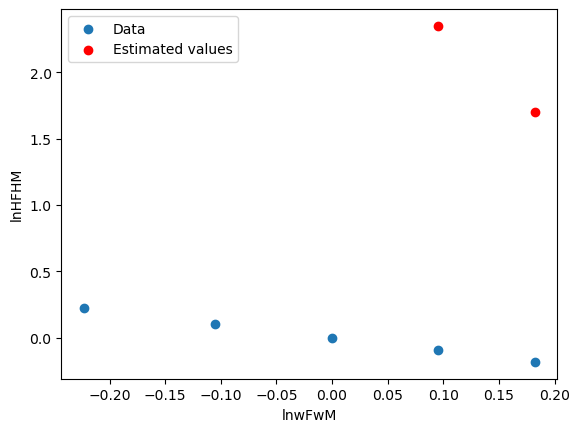

In [8]:
import matplotlib.pyplot as plt

solve = HouseholdSpecializationModelClass()
solve.par.alpha = 0.5

lnwFwM_vec, lnHFHM_vec = solve.solve_nonconstantwF_vec(wflist)

# Run the regression to estimate the coefficients beta0 and beta1 that minimize the sum of squared errors
x = lnwFwM_vec
y = lnHFHM_vec
A = np.vstack([np.ones(x.size), x]).T
best_beta0, best_beta1 = np.linalg.lstsq(A, y, rcond=None)[0]

# Calculate the values predicted by the regression line
Estimated_values = best_beta0 + best_beta1 * np.log(x)

# Plot the data points and the regression line
plt.scatter(lnwFwM_vec, lnHFHM_vec, label='Data')
plt.scatter(lnwFwM_vec, Estimated_values, color='red', label='Estimated values')
plt.xlabel('lnwFwM')
plt.ylabel('lnHFHM')
plt.legend()
plt.show()